# 2019年度投手データの偏相関

## データ

ここのhttp://npb.jp/bis/players/ 投手データを使う．

- セ・リーグ12人
- パ・リーグ12人

In [1]:
import scipy as sp
from scipy import linalg
import numpy.linalg as linalg_np
import pandas as pd


def cor2pcor(R):
    inv_cor = linalg.inv(R, check_finite=True)
#     print(inv_cor)
    rows = inv_cor.shape[0]
    regu_1 = 1 / sp.diag(inv_cor)
#     print("regu_1:", regu_1)
    regu_2 = sp.repeat(regu_1, rows).reshape(rows, rows)
#     print(regu_2)
    pcor = (-inv_cor) * sp.sqrt(regu_1 * regu_2)
    sp.fill_diagonal(pcor, 1)
    return pcor

In [2]:
df = pd.read_csv("2019.csv", header=0, encoding="utf-8")
df

,選手名,所属,身長[cm],体重[kg],出生日,登板,勝利,敗北,セーブ,H,...,被本塁打,四球,死球,三振,暴投,ボーク,失点,自責点,防御率,URL
0,大野 雄大,中日,183,83,1988-09-26,25,9,8,0,0,...,18,43,2,156,2,0,52,51,2.58,http://npb.jp/bis/players/11515133.html
1,ジョンソン,広島,193,93,1984-10-14,27,11,8,0,0,...,12,58,4,132,3,0,50,45,2.59,http://npb.jp/bis/players/53355130.html
2,山口 俊,巨人,187,98,1987-07-11,26,15,4,0,0,...,8,60,13,188,4,0,60,55,2.91,http://npb.jp/bis/players/51855112.html
3,今永 昇太,DeNA,177,82,1993-09-01,25,13,7,0,0,...,18,56,4,186,2,0,59,55,2.91,http://npb.jp/bis/players/01305132.html
4,西 勇輝,阪神,181,80,1990-11-10,26,10,8,0,0,...,12,36,9,112,2,0,60,56,2.92,http://npb.jp/bis/players/71275118.html
5,青柳 晃洋,阪神,183,84,1993-12-11,25,9,9,0,0,...,14,42,12,100,0,1,56,50,3.14,http://npb.jp/bis/players/71175132.html
6,大瀬良 大地,広島,187,93,1991-06-17,26,11,9,0,0,...,22,35,4,136,4,0,72,68,3.53,http://npb.jp/bis/players/61365139.html
7,柳 裕也,中日,180,85,1994-04-22,26,11,7,0,0,...,21,38,3,146,3,0,69,67,3.53,http://npb.jp/bis/players/63165134.html
8,小川 泰弘,東京ヤクルト,171,80,1990-05-16,26,5,12,0,0,...,26,36,2,132,1,0,91,81,4.57,http://npb.jp/bis/players/11515137.html
9,髙橋 優貴,読売,178,82,1997-02-01,18,5,7,0,0,...,14,48,5,89,1,0,34,33,3.19,http://npb.jp/bis/players/61965138.html


In [3]:
df.dtypes

選手名        object
所属         object
身長[cm]      int64
体重[kg]      int64
出生日        object
登板          int64
勝利          int64
敗北          int64
セーブ         int64
H           int64
HP          int64
完投          int64
完封勝         int64
無四球         int64
勝率        float64
打者          int64
投球回       float64
被安打         int64
被本塁打        int64
四球          int64
死球          int64
三振          int64
暴投          int64
ボーク         int64
失点          int64
自責点         int64
防御率       float64
URL        object
dtype: object

In [4]:
# zero only のカラム除外
df_nonzero = df.loc[:, (df != 0).any(axis=0)]
# 名前，所属,出生日,URLの除外
# 自責点と失点はほぼ一致するので多重共線性のために除外
df_out = df_nonzero.drop(["選手名","所属","出生日","URL"], axis=1)
df_out

,身長[cm],体重[kg],登板,勝利,敗北,セーブ,H,HP,完投,完封勝,...,被安打,被本塁打,四球,死球,三振,暴投,ボーク,失点,自責点,防御率
0,183,83,25,9,8,0,0,0,2,2,...,132,18,43,2,156,2,0,52,51,2.58
1,193,93,27,11,8,0,0,0,1,1,...,132,12,58,4,132,3,0,50,45,2.59
2,187,98,26,15,4,0,0,0,0,0,...,137,8,60,13,188,4,0,60,55,2.91
3,177,82,25,13,7,0,0,0,3,3,...,128,18,56,4,186,2,0,59,55,2.91
4,181,80,26,10,8,0,0,0,1,1,...,159,12,36,9,112,2,0,60,56,2.92
5,183,84,25,9,9,0,0,0,1,1,...,145,14,42,12,100,0,1,56,50,3.14
6,187,93,26,11,9,0,0,0,6,2,...,176,22,35,4,136,4,0,72,68,3.53
7,180,85,26,11,7,0,0,0,1,0,...,165,21,38,3,146,3,0,69,67,3.53
8,171,80,26,5,12,0,0,0,2,1,...,173,26,36,2,132,1,0,91,81,4.57
9,178,82,18,5,7,0,0,0,0,0,...,70,14,48,5,89,1,0,34,33,3.19


## pairplot

In [5]:
df_out.shape

(24, 24)

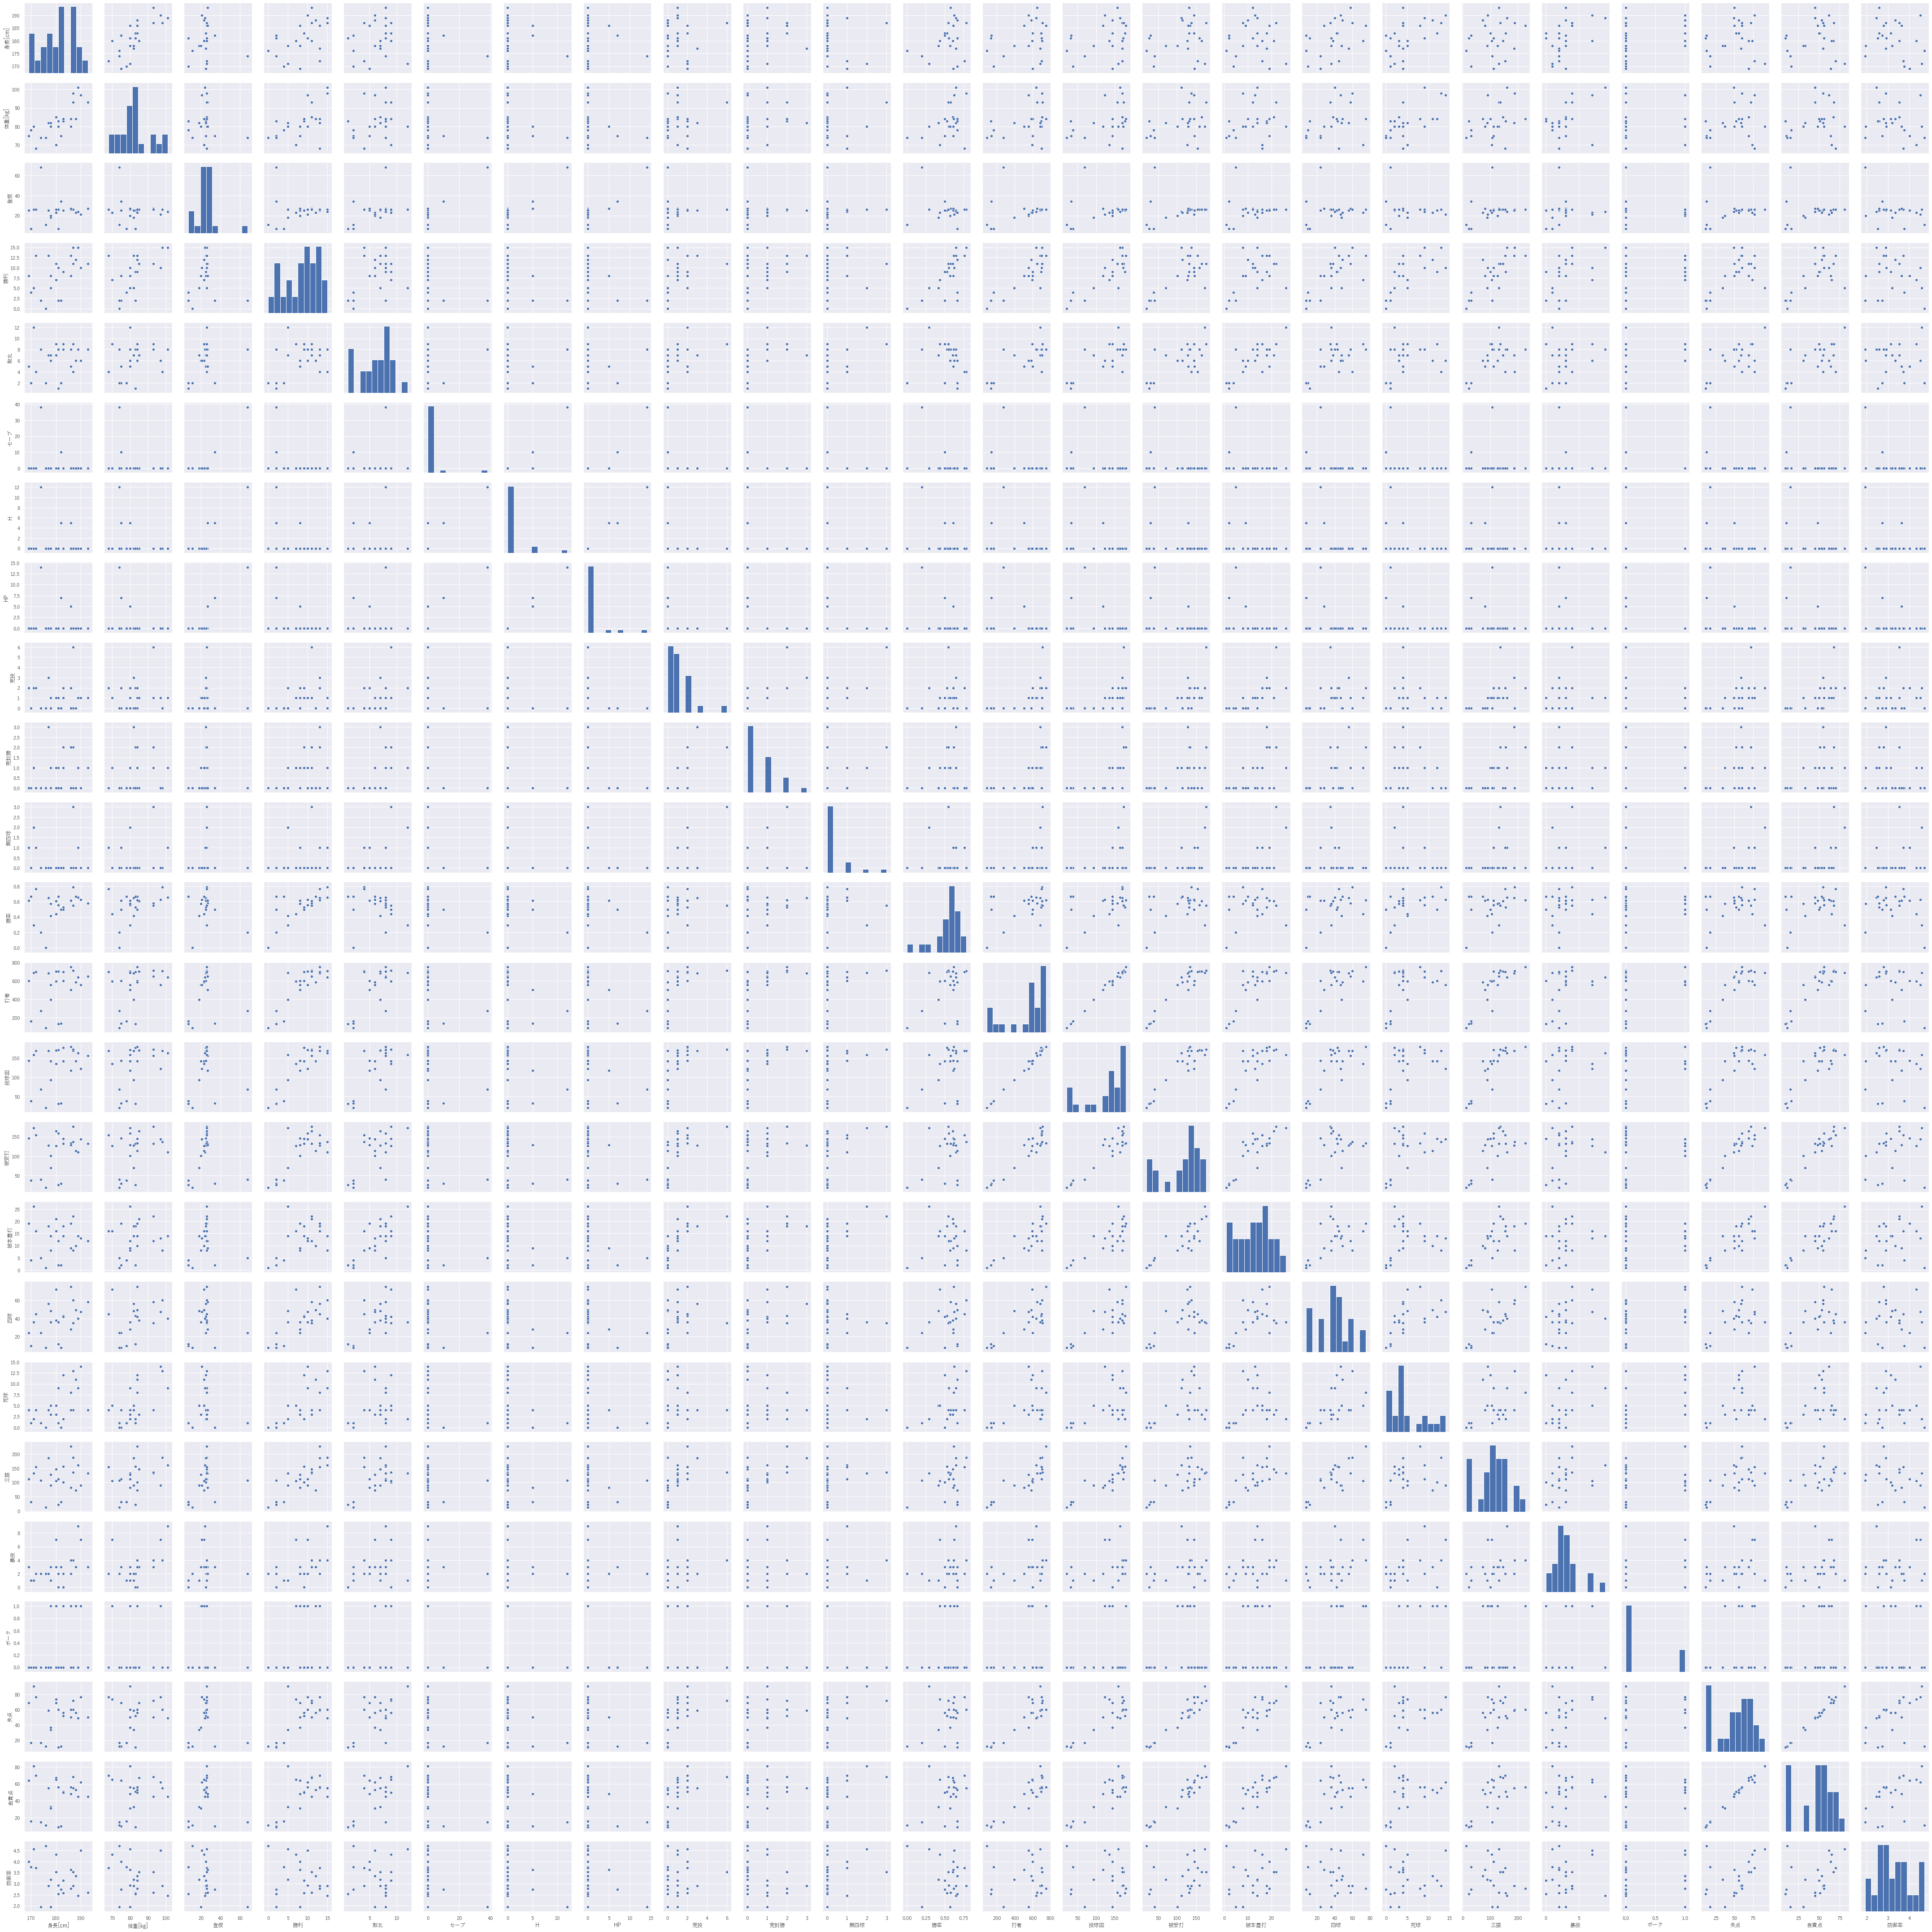

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='Yu Gothic')

%matplotlib inline

sns.pairplot(df_out)
plt.savefig("pairplot.png")
plt.show()

## 相関係数行列

### 全カラム

In [7]:
R = df_out.corr()
R

,身長[cm],体重[kg],登板,勝利,敗北,セーブ,H,HP,完投,完封勝,...,被安打,被本塁打,四球,死球,三振,暴投,ボーク,失点,自責点,防御率
身長[cm],1.000000,0.744160,-0.008142,0.483811,0.159785,-0.205245,-0.121435,-0.126059,0.025720,0.180089,...,0.225669,-0.023131,0.423581,0.559353,0.205173,0.471573,0.290856,0.115327,0.108080,-0.257762
体重[kg],0.744160,1.000000,-0.114382,0.554232,0.207325,-0.257829,-0.285036,-0.292414,0.160410,0.186657,...,0.300393,0.153259,0.295777,0.584959,0.343036,0.449599,0.037206,0.203015,0.193562,-0.204442
登板,-0.008142,-0.114382,1.000000,0.010499,0.380636,0.851269,0.816608,0.818443,0.037069,0.023848,...,0.073929,0.069707,0.087406,-0.037204,0.288417,0.074101,-0.087760,0.037323,0.041713,-0.377693
勝利,0.483811,0.554232,0.010499,1.000000,0.350449,-0.393801,-0.410936,-0.428704,0.397040,0.402504,...,0.734028,0.523892,0.708483,0.658409,0.792295,0.455805,0.187995,0.655942,0.677293,-0.151969
敗北,0.159785,0.207325,0.380636,0.350449,1.000000,0.044217,-0.043023,-0.061886,0.470043,0.557229,...,0.657218,0.757299,0.568116,0.252669,0.571628,0.203154,0.225335,0.633864,0.638278,-0.011932
セーブ,-0.205245,-0.257829,0.851269,-0.393801,0.044217,1.000000,0.920855,0.929438,-0.217359,-0.201988,...,-0.404976,-0.319393,-0.256826,-0.273093,-0.105018,-0.086044,-0.148659,-0.395967,-0.405171,-0.386634
H,-0.121435,-0.285036,0.816608,-0.410936,-0.043023,0.920855,1.000000,0.995773,-0.287526,-0.267192,...,-0.394155,-0.378851,-0.328347,-0.305990,-0.185856,-0.110776,-0.196648,-0.412703,-0.414000,-0.333990
HP,-0.126059,-0.292414,0.818443,-0.428704,-0.061886,0.929438,0.995773,1.000000,-0.288095,-0.267721,...,-0.419932,-0.393237,-0.344267,-0.318862,-0.200813,-0.104240,-0.197038,-0.434017,-0.437324,-0.346301
完投,0.025720,0.160410,0.037069,0.397040,0.470043,-0.217359,-0.287526,-0.288095,1.000000,0.699005,...,0.603550,0.710426,0.253075,-0.025827,0.504361,0.136437,-0.054153,0.558205,0.578284,0.105378
完封勝,0.180089,0.186657,0.023848,0.402504,0.557229,-0.201988,-0.267192,-0.267721,0.699005,1.000000,...,0.402686,0.530769,0.470556,0.024000,0.605277,0.100232,0.113228,0.319587,0.341400,-0.235503


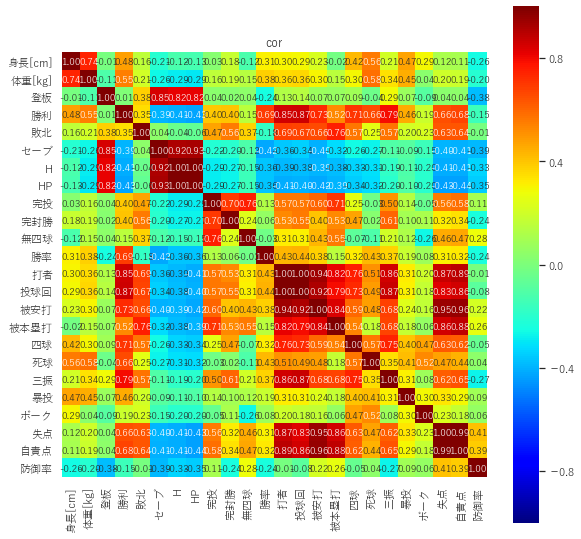

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font='Yu Gothic')

%matplotlib inline

fig = plt.figure(figsize=(9.5,9.5))
column_name = R.columns.to_list()
# column_name
sns.heatmap(R.values, annot=True, square=True, vmin=-1, vmax=1, fmt=".2f", cmap="jet", 
           xticklabels=column_name, yticklabels=column_name)
plt.savefig("corr_allcol.png")
plt.title("cor")
plt.show()

### 多重共線性(multicollinearity)の検討

共分散行列（相関係数行列）のrankを調べるとある程度わかる．


原因：

- データの数より変数の数が多い．(http://seetheworld1992.hatenablog.com/entry/2017/03/22/194932)
共分散行列は正則にならない＝正定値でない

- また，偏相関係数行列は逆行列の対角成分で除算するのでzeroがないかチェックする．

- また，対角成分の符号がそろっていないと多重共線性の疑い
（偏相関係数の分母のルートの計算ができない）

実際に

- 自責点，失点，防御率は相関高い -> 防御率の計算に使っているため
-> 自責点は除外

- 勝率は勝敗と登板から計算できるので除外

- H, HPはほぼ0なので除外

In [9]:
R.shape, linalg_np.matrix_rank(R)

((24, 24), 23)

In [10]:
df_out2 = df_out.drop(["勝率","H","HP","自責点"], axis=1)
#df_out2 = df_out.drop(["勝率","打者","自責点","失点","体重[kg]","ボーク"], axis=1)
df_out2

,身長[cm],体重[kg],登板,勝利,敗北,セーブ,完投,完封勝,無四球,打者,投球回,被安打,被本塁打,四球,死球,三振,暴投,ボーク,失点,防御率
0,183,83,25,9,8,0,2,2,0,696,177.2,132,18,43,2,156,2,0,52,2.58
1,193,93,27,11,8,0,1,1,0,650,156.2,132,12,58,4,132,3,0,50,2.59
2,187,98,26,15,4,0,0,0,0,705,170.0,137,8,60,13,188,4,0,60,2.91
3,177,82,25,13,7,0,3,3,0,684,170.0,128,18,56,4,186,2,0,59,2.91
4,181,80,26,10,8,0,1,1,0,702,172.1,159,12,36,9,112,2,0,60,2.92
5,183,84,25,9,9,0,1,1,0,601,143.1,145,14,42,12,100,0,1,56,3.14
6,187,93,26,11,9,0,6,2,3,712,173.1,176,22,35,4,136,4,0,72,3.53
7,180,85,26,11,7,0,1,0,0,703,170.2,165,21,38,3,146,3,0,69,3.53
8,171,80,26,5,12,0,2,1,2,686,159.2,173,26,36,2,132,1,0,91,4.57
9,178,82,18,5,7,0,0,0,0,395,93.0,70,14,48,5,89,1,0,34,3.19


In [11]:
R_out = df_out2.corr()
R_out.shape,linalg_np.matrix_rank(R_out)

((20, 20), 20)

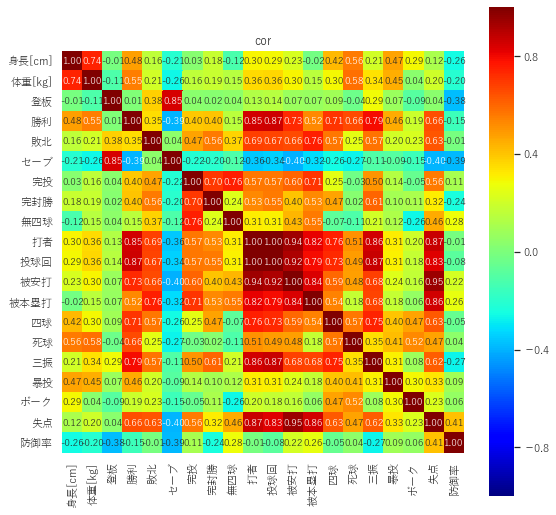

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font='Yu Gothic')

%matplotlib inline

fig = plt.figure(figsize=(9,9))
column_name = df_out2.columns.to_list()
# column_name
R_out = df_out2.corr()
sns.heatmap(R_out.values, annot=True, square=True, vmin=-1, vmax=1, fmt=".2f", cmap="jet", 
           xticklabels=column_name, yticklabels=column_name)
plt.savefig("corr_decDim.png")
plt.title("cor")
plt.show()

In [13]:
diag = sp.diag(linalg.inv(R_out.values))

def check_same_sign(a):
    return sp.all(a<=0) or sp.all(a>=0)

check_same_sign(diag), diag

(True, array([1.40502100e+01, 1.39937845e+01, 4.39575580e+01, 3.46214472e+01,
        1.05610560e+02, 8.24634204e+01, 1.14923312e+02, 4.99263398e+01,
        4.57451039e+01, 8.87932854e+03, 4.97257190e+03, 8.56826106e+02,
        6.51735948e+01, 1.46269658e+02, 8.59730521e+00, 4.59628134e+01,
        4.91618538e+00, 3.97753488e+00, 1.92351483e+02, 9.91691391e+00]))

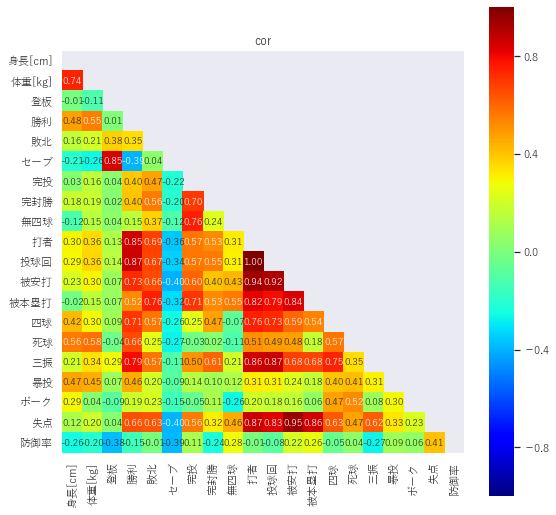

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig = plt.figure(figsize=(9,9))
mask = sp.zeros_like(R_out, dtype=np.bool)
sp.triu_indices_from(mask)
mask[sp.triu_indices_from(mask)] = True
sns.heatmap(R_out.values, annot=True, mask=mask, square=True, vmin=-1, vmax=1, fmt=".2f", cmap="jet", 
           xticklabels=column_name, yticklabels=column_name)
plt.savefig("corr_decDim_diag.png")
plt.title("cor")
plt.show()

## 偏相関

In [16]:
pcor = cor2pcor(R_out.values)
pcor

array([[ 1.        ,  0.81276473,  0.47447452, -0.23903421, -0.43685827,
        -0.07668361, -0.34491263,  0.40775012,  0.3673636 , -0.16799769,
         0.18890832,  0.34113276,  0.26288838,  0.47211074, -0.1734598 ,
        -0.63795739,  0.39160217,  0.41675957, -0.48720991,  0.21810956],
       [ 0.81276473,  1.        , -0.49207163,  0.3114318 ,  0.44617823,
         0.06265583,  0.30869934, -0.36837798, -0.3043299 ,  0.1425796 ,
        -0.19286665, -0.22740214, -0.23413515, -0.39970862,  0.3772523 ,
         0.62280813, -0.12079204, -0.55796297,  0.34462805, -0.35279737],
       [ 0.47447452, -0.49207163,  1.        , -0.05987984, -0.14695677,
         0.8152603 , -0.24798712,  0.20408041,  0.22010773,  0.00672863,
         0.00236669,  0.16379881,  0.22732896,  0.00987851,  0.19789638,
         0.05472851,  0.2142409 , -0.21713098, -0.19205362,  0.07845571],
       [-0.23903421,  0.3114318 , -0.05987984,  1.        , -0.7249888 ,
         0.37738349, -0.58912663,  0.57504989,  

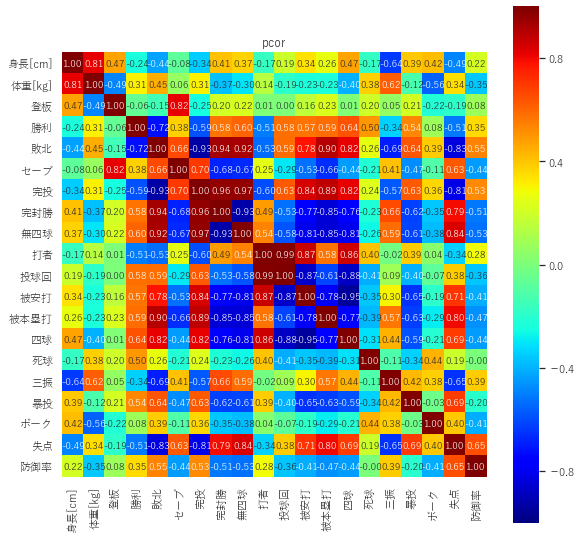

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='Yu Gothic')

%matplotlib inline

fig = plt.figure(figsize=(9.5,9.5))

sns.heatmap(pcor, annot=True, square=True, vmin=-1, vmax=1, fmt=".2f", cmap="jet",
           xticklabels=column_name, yticklabels=column_name)
plt.savefig("pcor.png")
plt.title("pcor")
plt.show()

### 条件付き独立

この20項目与えられたときの条件付き独立をみる．
偏相関係数が(-0.1,0.1)の範囲を条件付き独立としてみる．


In [18]:
ind_cond = (-0.1 < pcor) & (pcor < 0.1)
c = sp.where(ind_cond)
col = R_out.columns
list_cond_indepentset = set()
for i, j in zip(c[0], c[1]):
    s = tuple(sorted((col[i], col[j])))
    list_cond_indepentset.add(s)

list_cond_indepentset

{('セーブ', '体重[kg]'),
 ('セーブ', '身長[cm]'),
 ('ボーク', '勝利'),
 ('ボーク', '打者'),
 ('ボーク', '投球回'),
 ('ボーク', '暴投'),
 ('三振', '打者'),
 ('三振', '投球回'),
 ('三振', '登板'),
 ('勝利', '登板'),
 ('四球', '登板'),
 ('打者', '登板'),
 ('投球回', '登板'),
 ('死球', '防御率'),
 ('登板', '防御率')}

ボーク回数や登板回数が他の変数と独立関係にあることが多いとわかる．

選手の優秀さを表すような勝利数や防御率に着目すると，

- 勝利数とボーク数は条件付き独立独立（無関係）
- 勝利数が多いと登板数も多いように直感的に思うが，勝利数と登板数は条件付き独立
- 防御率と死球は条件付き独立
- 防御率が低い（優秀である）と登板数も増えそうだが，防御率と登板数は条件付き独立


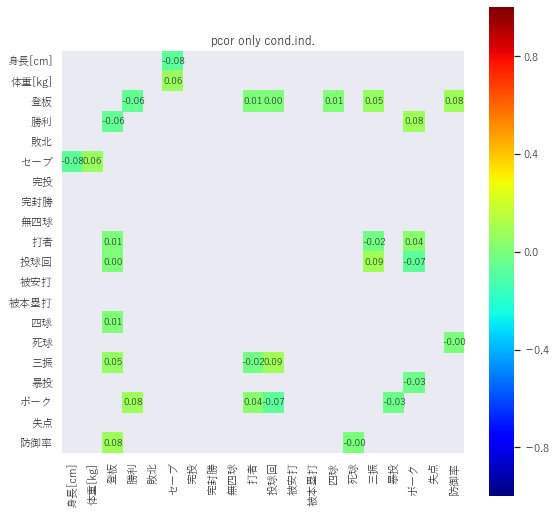

In [19]:
%matplotlib inline

fig = plt.figure(figsize=(9,9))
sns.heatmap(pcor, annot=True, mask=sp.logical_not(ind_cond), square=True, vmin=-1, vmax=1, fmt=".2f", cmap="jet",
           xticklabels=column_name, yticklabels=column_name)
plt.savefig("pcorr_only_mask_cond.png")
plt.title("pcor only cond.ind.")
plt.show()

### 勝利数

勝利数がどの変数と偏相関があるかを見る．

In [20]:
idx = column_name.index("勝利")
pcor_winnum = pd.Series(pcor[idx], index=column_name)
pcor_winnum.sort_values(ascending=False)

勝利        1.000000
四球        0.642020
無四球       0.603793
被本塁打      0.586582
投球回       0.579033
完封勝       0.575050
被安打       0.574459
暴投        0.536554
死球        0.497758
セーブ       0.377383
防御率       0.352614
体重[kg]    0.311432
ボーク       0.081238
登板       -0.059880
身長[cm]   -0.239034
三振       -0.340608
打者       -0.506458
失点       -0.513885
完投       -0.589127
敗北       -0.724989
dtype: float64

- 当たり前のところで行くと，勝利数が多いとその分敗北数が少ない（-0.72），
そして失点も少ない(-0.514)，完封勝利も多い(0.575)．
- 勝利数が多いと，四球が多く(0.64)また無四球試合も多い(0.60)．
直感に反するが，おそらく意図的にボール球を投げられるかのコントロール性の高さを表している？
- 勝利数が多い選手は，完投が少ない(-0.589)
- 勝利数が多い選手は，被本塁打も多い，HRはなんだかんだ打たれている(0.587)．そして，被安打も多い，HRよりも低いがほぼ同等ヒットもなんだかんだ打たれている(0.574)
- 勝利数が多い選手は，投球回数も多い．直感に合う(0.579)
- 勝利数が多い選手は，暴投も多い(0.537)，そして死球も多い(0.498)
- 勝利数が多い選手は，打者として打席に立つのは少ない(-0.506)
- 勝利数が多い選手は，セーブ数も多い(0.377)
- 勝利数が多い選手は，防御率も高い(0.353)．防御率は低い方が高評価なのでこれは直感に反する．勝利数と敗北数が同じくらいの一部選手の偏りの可能性あり
- 勝利数が多い選手は，奪三振が少ない(-0.34)．これも直感に反する．
- 勝利数が多い選手は，体重が重い傾向(0.31)．逆に身長は低い傾向(-0.239)にある．ただこれはサンプルの偏りの可能性もあり


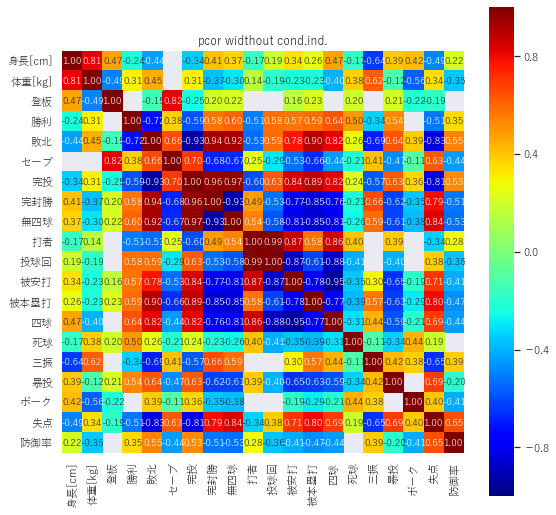

In [21]:
%matplotlib inline

fig = plt.figure(figsize=(9,9))
sns.heatmap(pcor, annot=True, mask=ind_cond, square=True, vmin=-1, vmax=1, fmt=".2f", cmap="jet",
           xticklabels=column_name, yticklabels=column_name)
plt.savefig("pcorr_mask_cond.png")
plt.title("pcor widthout cond.ind.")
plt.show()

### 防御率について

In [431]:
idx = column_name.index("防御率")
pcor_winnum = pd.Series(pcor[idx], index=column_name)
pcor_winnum.sort_values(ascending=False)

防御率       1.000000
失点        0.648739
敗北        0.546813
完投        0.527748
三振        0.386311
勝利        0.352614
打者        0.284757
身長[cm]    0.218110
登板        0.078456
死球       -0.002031
暴投       -0.200287
体重[kg]   -0.352797
投球回      -0.359943
被安打      -0.412098
ボーク      -0.413773
セーブ      -0.441115
四球       -0.441360
被本塁打     -0.466979
完封勝      -0.511341
無四球      -0.530140
dtype: float64

- 防御率の低い（優秀な）選手は，失点が少ない(0.649)．
- 防御率の低い選手は，敗北も少ない(0.547)．
- 防御率の低い選手は，無四球試合が多い(-0.530),そして四球も多い．(-0.441)．
- 防御率の低い選手は，完投が少ない(0.528)．
- 防御率の低い選手は，完封勝ちは多い(-0.511)
- 防御率の低い選手は，被本塁打は多い．HRはそれなりに打たれている(-0.467)，
そして被安打も多い(-0.412)
- 防御率の低い選手は，セーブは多い．(-0.441)
- 防御率の低い選手は，ボークが多い(-0.413)．ボークほどでないが暴投も多い傾向(-0.2)．
- 防御率の低い選手は，奪三振が少ない(0.386)．直感に反する．
- 防御率の低い選手は，投球回は多い(-0.36)．
- 防御率の低い選手は，体重が重い傾向（-0.353），逆に身長は低い傾向（0.218）．これは勝利数のときと同じだが，サンプルの偏りの可能性あり．
- 防御率の低い選手は，勝利数は少ない（直感に反する）(0.353)
- 防御率の低い選手は，打者として打席に立つのは少ない（直感に反する）(0.285)


## 参考

- http://npb.jp/bis/yearly/centralleague_2019.html
- http://www.ae.keio.ac.jp/lab/soc/takeuchi/lectures/5_Parcor.pdf